In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import plotnine as pn
import gseapy

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
adjustText          NA
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bioservices         1.7.11
boto3               1.20.24
botocore            1.23.24
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
descartes           NA
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstr

In [6]:
heart_infection_sc_4samples_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_4samples_no_viral_genes.h5ad")

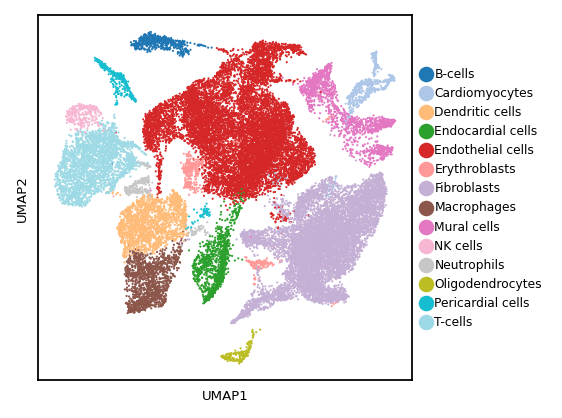

In [7]:
sc.pl.umap(heart_infection_sc_4samples_no_viral_genes, color = ['celltype_groups'], palette="tab20", title="")

In [8]:
heart_infection_sc_4samples_no_viral_genes.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI",  "Mock_D7PI",  "T1L-WT_D7PI",  "Mock_D10PI", "T1L-WT_D10PI"], inplace = True)

In [161]:
myocardium = heart_infection_sc_4samples_no_viral_genes.raw.to_adata()[heart_infection_sc_4samples_no_viral_genes.obs["celltype_groups"].isin(["Cardiomyocytes"])]
sc.pp.filter_genes(myocardium, min_cells = 10)
myocardium

filtered out 13732 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.


AnnData object with n_obs × n_vars = 562 × 9025
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.8', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'leiden_0.4', 'leiden_0.45', 'celltype_groups', 'T1LReoS1_xGen3', 'T1LReoS2_xGen3', 'T1LReoS3_xGen3', 'T1LReoS4_xGen3', 'T1LReoM1_xGen3', 'T1LReoM2_xGen3', 'T1LReoM3_xGen3', 'T1LReoL1_xGen3', 'T1LReoL2_xGen3', 'T1LReoL3_xGen3', 'total_viral_xGen3', 'pct_viral_xGen3', 'total_viral_NA', 'total_viral_xGen3_NA', 'total_viral_xGen4_NA', 'viral_exp'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly

In [162]:
s_genes = list(pd.read_csv("./../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
2681


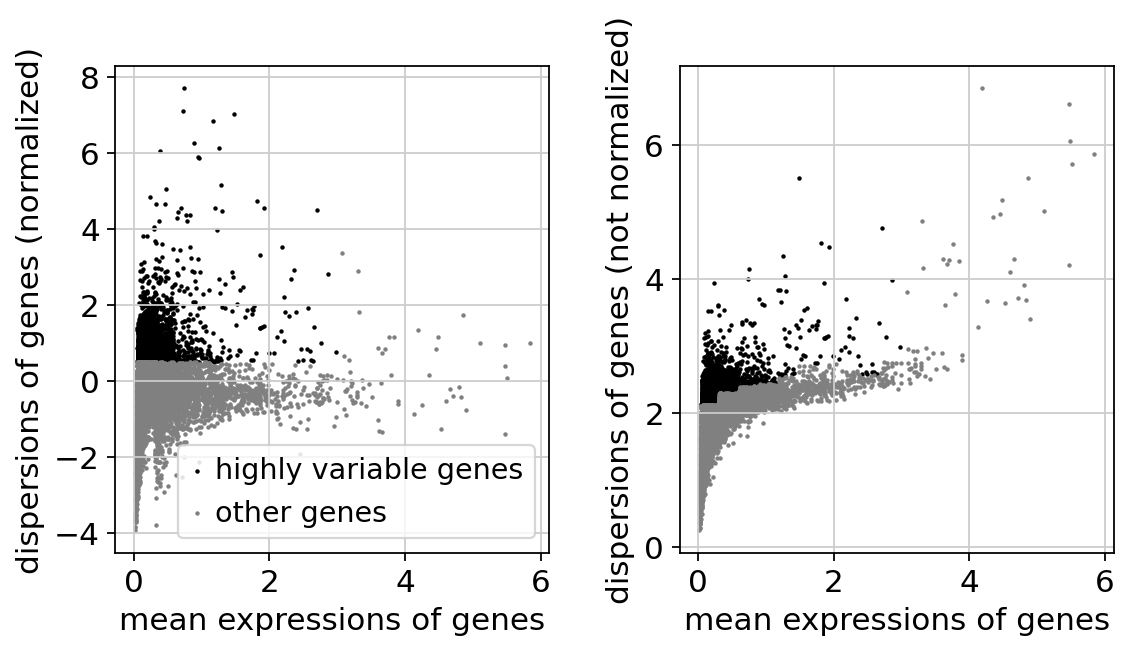

(562, 2681)
calculating cell cycle phase
computing score 'S_score'


Trying to set attribute `.obs` of view, copying.


    finished: added
    'S_score', score of gene set (adata.obs).
    413 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    746 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


... storing 'phase' as categorical


    finished (0:00:06)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


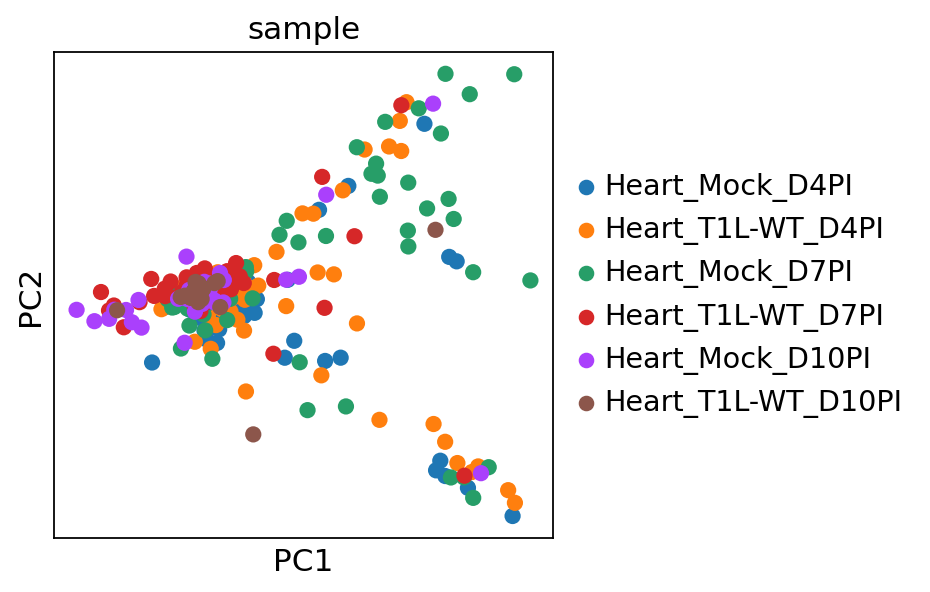

In [163]:
sc.pp.highly_variable_genes(myocardium, max_mean=3, min_disp=0.5)
print(np.sum(myocardium.var.highly_variable))
sc.pl.highly_variable_genes(myocardium, )
myocardium.raw = myocardium
myocardium = myocardium[:, myocardium.var.highly_variable]
print(myocardium.shape)
sc.tl.score_genes_cell_cycle(myocardium, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.regress_out(myocardium, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], )
sc.pp.scale(myocardium, max_value=10)
sc.tl.pca(myocardium, svd_solver='arpack', )
sc.pl.pca(myocardium, color= "sample")

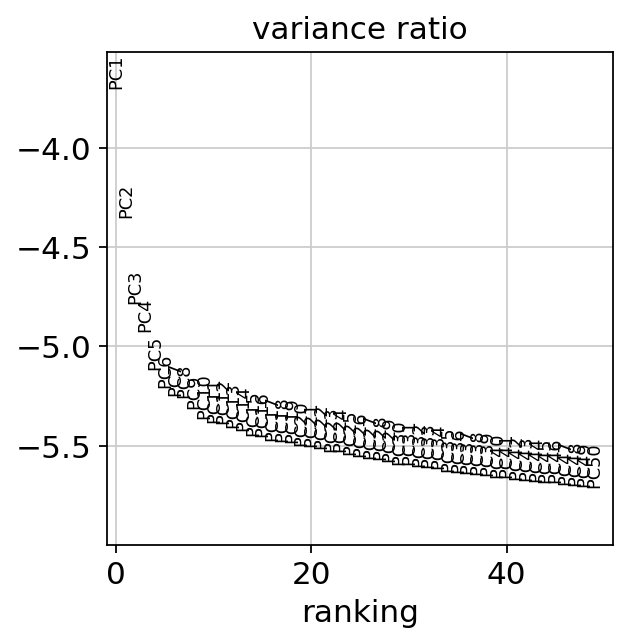

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 5 clusters and added
    'myo_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 5 clusters and added
    'myo_leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)


In [164]:
sc.pl.pca_variance_ratio(myocardium, n_pcs = 50, log=True)
sc.pp.neighbors(myocardium, n_pcs=20)
sc.tl.umap(myocardium)
sc.tl.leiden(myocardium, key_added="myo_leiden_0.5", resolution = 0.5)
sc.tl.leiden(myocardium, key_added="myo_leiden_0.3", resolution = 0.3)

In [167]:
sc.tl.rank_genes_groups(myocardium, groupby='myo_leiden_0.3', method='wilcoxon', key_added='rank_genes_groups_myo_leiden_0.3')

ranking genes
    finished: added to `.uns['rank_genes_groups_myo_leiden_0.3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


In [191]:
pd.DataFrame(myocardium.uns['rank_genes_groups_myo_leiden_0.3']["names"]).head(20)

,0,1,2,3,4
0,Fabp3,Sln,Isg15,Fabp4,Dcn
1,Myl3,Myl4,B2m,Tmsb4x,Col1a1
2,Myl2,Myl7,F830016B08Rik,Gpihbp1,Col3a1
3,Pln,Nppa,Irgm1,Col4a1,Postn
4,Mb,Myl1,Iigp1,Sparc,Fstl1
5,Tnnc1,Stard10,Igtp,Actb,Igfbp7
6,Fth1,Fgf12,Psmb10,Fabp5,Col1a2
7,Slc25a4,Mybphl,Psmb8,Cd36,Fbn1
8,Tpm1,Myl9,Gm4841,Sparcl1,Gsn
9,Ckm,Pam,Bst2,Actg1,Sparc


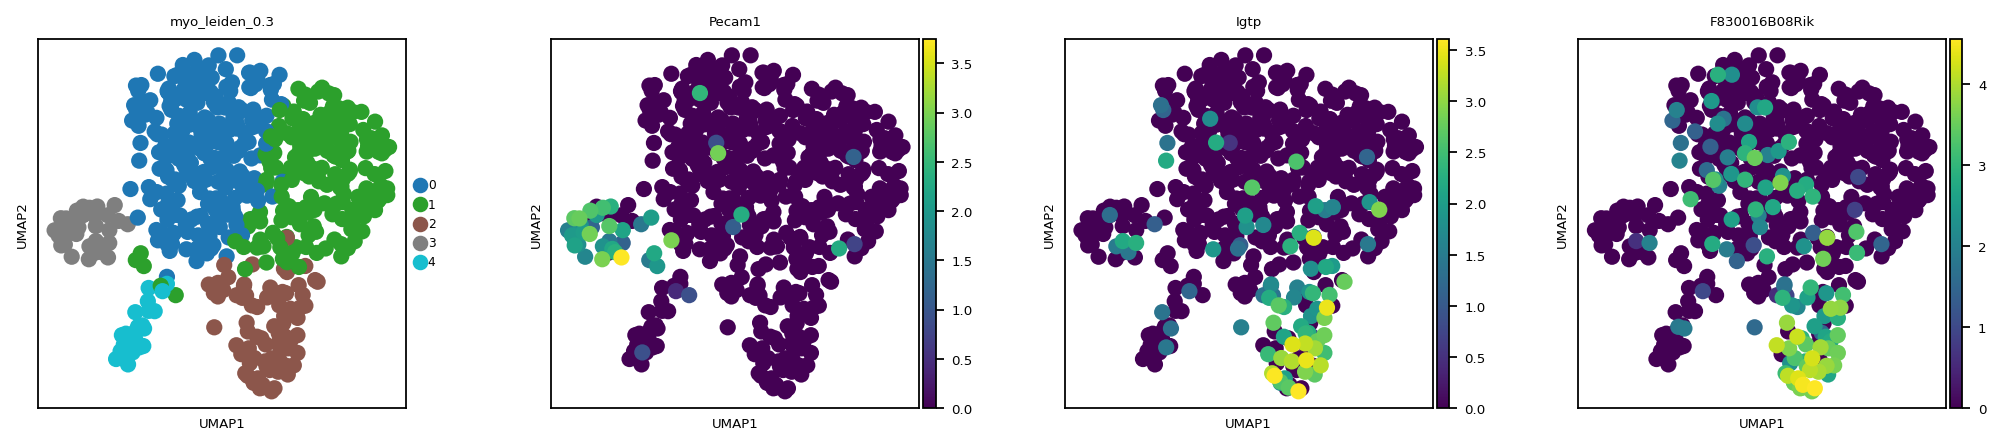

In [255]:
sc.pl.umap(myocardium, color = ["myo_leiden_0.3", "Pecam1", "Igtp", "F830016B08Rik"])

In [228]:
myocardium_only = myocardium[~myocardium.obs["myo_leiden_0.3"].isin(["3", "4"])]
myocardium_only.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI",  "Mock_D7PI",  "T1L-WT_D7PI",  "Mock_D10PI", "T1L-WT_D10PI"], inplace = True)

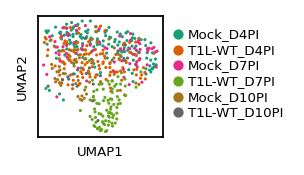

In [231]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(myocardium_only, color = ["condition"], size=8, palette="Dark2", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_myocardium_condition.pdf")

In [232]:
myocardium_only.obs["cell_phenotypes"] = myocardium_only.obs["myo_leiden_0.3"]
phenotypes = {'0': "Vetricular CMs", 
                '1': "Atrial CMs", 
                '2': "Inflamed CMs"}
myocardium_only.obs["cell_phenotypes"] = myocardium_only.obs["cell_phenotypes"].map(phenotypes).astype("category")

In [233]:
sc.tl.rank_genes_groups(adata=myocardium_only, groupby="cell_phenotypes", key_added="rank_genes_myo_cell_phenotypes", method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_myo_cell_phenotypes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [234]:
pd.DataFrame(myocardium_only.uns['rank_genes_myo_cell_phenotypes']["names"]).head(10)

,Vetricular CMs,Atrial CMs,Inflamed CMs
0,Fabp3,Sln,B2m
1,Myl2,Myl4,Isg15
2,Myl3,Myl7,Irgm1
3,Pln,Nppa,Iigp1
4,Mb,Myl1,F830016B08Rik
5,Tnnc1,Stard10,Igtp
6,Fth1,Cst3,Psmb10
7,Ckm,Mybphl,Psmb8
8,Slc25a4,Fgf12,Bst2
9,Tpm1,Gpx3,Irf7


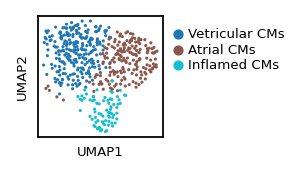

In [235]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(myocardium_only, color = ["cell_phenotypes"], size=8, palette="tab10", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_myocardium_cell_phenotypes.pdf")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_phenotypes']`


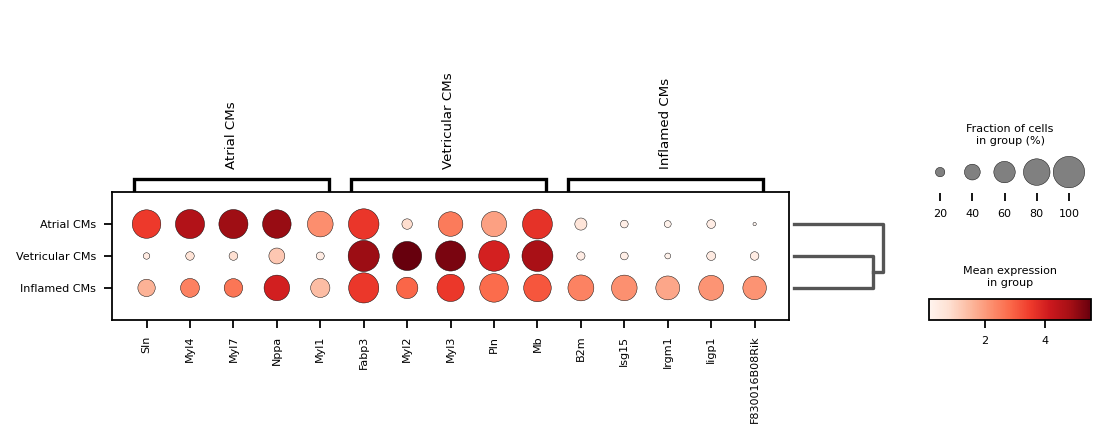

In [184]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")
sc.pl.rank_genes_groups_dotplot(myocardium_only, key='rank_genes_myo_cell_phenotypes', n_genes=5, save="myo_dotplot.pdf")

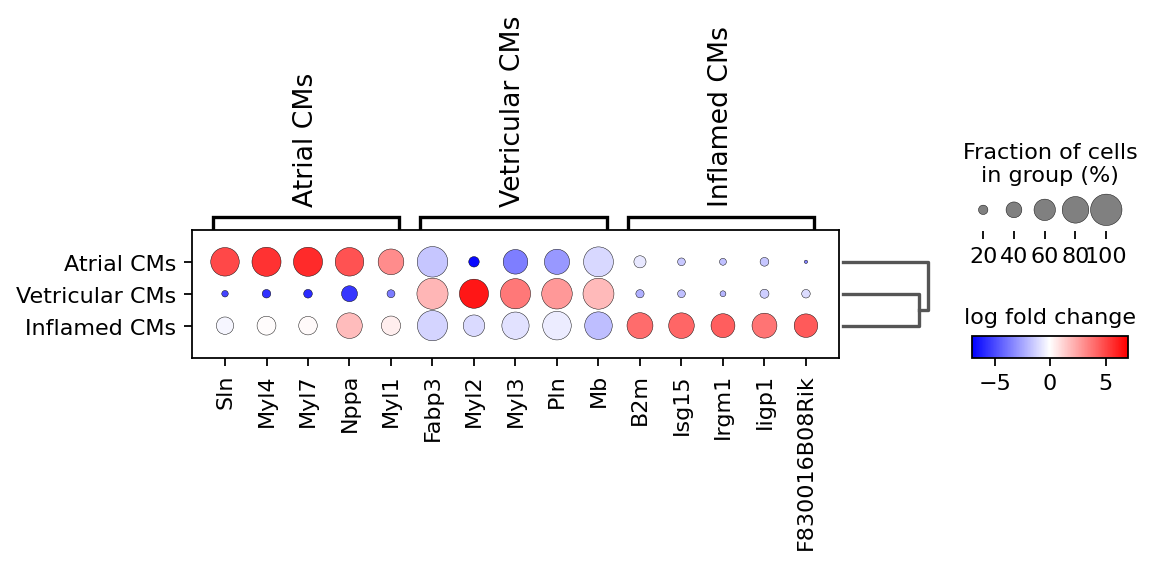

In [185]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (7.5,2.5))
sc.pl.rank_genes_groups_dotplot(myocardium_only, n_genes=5, key="rank_genes_myo_cell_phenotypes", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/myo_dotplot.pdf")

In [188]:
myocardium_only.write_h5ad("./../pyobjs/myocardium_only.h5ad")

In [2]:
myocardium_only = sc.read_h5ad("./../pyobjs/myocardium_only.h5ad")

In [10]:
infection_markers = sc.get.rank_genes_groups_df(myocardium_only, key="rank_genes_groups_myo_leiden_0.3", group = ["2"])
infection_markers = infection_markers[(infection_markers["logfoldchanges"] > 0) & (infection_markers["pvals"] < 0.01)]
infection_markers = infection_markers.sort_values(by = "scores", ascending=False)
print(list(infection_markers["names"][1:20]))
infection_markers

['B2m', 'F830016B08Rik', 'Irgm1', 'Iigp1', 'Igtp', 'Psmb10', 'Psmb8', 'Gm4841', 'Bst2', 'Irf7', 'Ankrd1', 'Gm12250', 'Nppb', 'Mt1', 'Psmb9', 'Cox6a2', 'Xaf1', 'H2-D1', 'Zbp1']


,names,scores,logfoldchanges,pvals,pvals_adj
0,Isg15,8.768523,3.901761,1.810250e-18,1.028428e-14
1,B2m,8.742550,3.575324,2.279065e-18,1.028428e-14
2,F830016B08Rik,8.488169,4.628678,2.099186e-17,4.894470e-14
3,Irgm1,8.484349,4.259445,2.169294e-17,4.894470e-14
4,Iigp1,8.394208,3.717871,4.690452e-17,8.466266e-14
...,...,...,...,...,...
114,Fuca2,2.611421,1.474367,9.016681e-03,5.425036e-01
115,Psmd12,2.596525,0.877570,9.417210e-03,5.628498e-01
116,Psmb1,2.587740,0.810347,9.660791e-03,5.711253e-01
117,Rps20,2.586976,0.920548,9.682235e-03,5.711253e-01


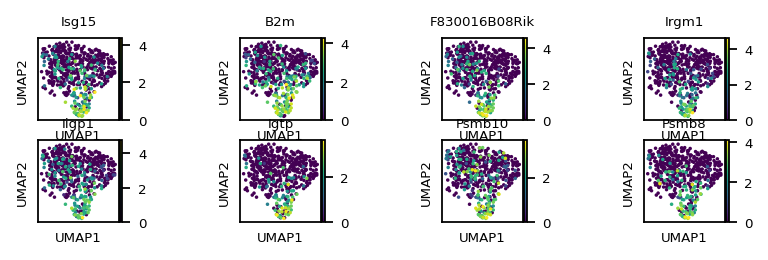

In [11]:
# sc.pl.umap(myocardium, color= infection_markers["names"][1:20], ncols=5)
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(0.6, 0.7), vector_friendly = False, transparent=True, format="pdf")
# fig, ax = plt.subplots(figsize = (0.6, 0.6))
sc.pl.umap(myocardium_only, color = infection_markers["names"][0:8], size=10, ncols=4, save="myofeatureplot.pdf")
# plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
# plt.savefig("figures/umap_endo_feature plots.pdf")

In [18]:
bz_markers = pd.read_csv("./../csvs/bz_markers_d7pi.csv")
bz_markers = bz_markers[(bz_markers["logfoldchanges"] > 0.5) & (bz_markers["pvals_adj"] < 0.01)]
bz_markers[1:30]

,names,scores,logfoldchanges,pvals,pvals_adj
1,Hspb7,10.250142,0.744525,1.181697e-24,5.303750e-21
2,Gzma,9.746756,1.324774,1.904587e-22,5.698842e-19
3,Cd52,9.636411,1.015644,5.611603e-22,1.259314e-18
6,Ly6c1,8.875836,0.947827,6.940997e-19,1.132834e-15
8,Saa3,8.779204,2.267262,1.646348e-18,2.111206e-15
10,Igtp,8.550296,0.657018,1.227737e-17,1.377598e-14
11,Ccl5,8.528065,1.109851,1.488162e-17,1.571587e-14
12,Ankrd1,8.485008,0.681686,2.157029e-17,2.151396e-14
13,Psmb10,8.404901,0.793612,4.282225e-17,4.046252e-14
14,Cxcl9,8.294386,1.022818,1.091476e-16,9.574842e-14


In [20]:
myocyte_markers = pd.read_csv("./../csvs/myocyte_markers.csv", index_col=0)
myocyte_markers = myocyte_markers[myocyte_markers["logfoldchanges"] > 1.0]
myocyte_markers

,names,scores,logfoldchanges,pvals,pvals_adj
0,Tnni3,40.536987,8.301436,0.000000,0.000000
1,Tnnt2,40.417866,8.097258,0.000000,0.000000
2,Tpm1,40.266293,6.630083,0.000000,0.000000
3,Actc1,39.918194,8.117577,0.000000,0.000000
4,Slc25a4,39.466690,4.544735,0.000000,0.000000
...,...,...,...,...,...
3684,Gm15672,-0.010237,1.120885,0.991832,0.999953
3691,Anp32-ps,-0.011126,1.014363,0.991123,0.999953
3692,Gls2,-0.011131,1.056080,0.991119,0.999953
3693,Tdrd12,-0.011131,1.080329,0.991119,0.999953


In [21]:
temp = bz_markers[bz_markers["logfoldchanges"] > 0.5]
temp = temp[temp["names"].isin(myocyte_markers['names'])]
temp

,names,scores,logfoldchanges,pvals,pvals_adj
0,Gm4841,12.290350,1.282930,1.020634e-34,1.832345e-30
1,Hspb7,10.250142,0.744525,1.181697e-24,5.303750e-21
12,Ankrd1,8.485008,0.681686,2.157029e-17,2.151396e-14
15,Des,8.291320,0.585762,1.119989e-16,9.574842e-14
17,Fabp3,8.063049,0.605624,7.441447e-16,5.808534e-13
19,Mt1,7.609022,0.707409,2.761786e-14,1.857068e-11
21,Ckmt2,7.543990,0.613482,4.558057e-14,2.922528e-11
22,Acta1,7.507663,1.227799,6.019231e-14,3.726319e-11
30,Pln,7.125395,0.605435,1.037824e-12,4.903171e-10
32,Myl2,7.029488,1.172834,2.072931e-12,9.303833e-10


In [24]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

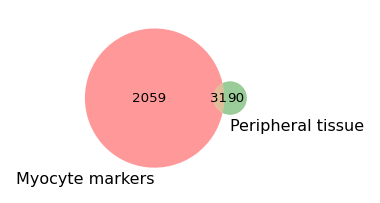

In [25]:
# Use the venn2 function
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.5,1.5))
venn2(subsets = (myocyte_markers.shape[0], bz_markers.shape[0], temp.shape[0]), set_labels = ('Myocyte markers', 'Peripheral tissue'))
# plt.show()
plt.savefig("figures/venn.pdf")

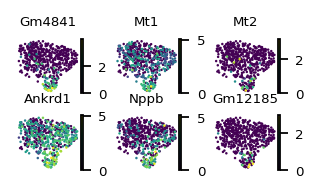

In [38]:

sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(0.5,0.5), vector_friendly= False, transparent=True, format="pdf")
# fig, ax = plt.subplots(figsize = (0.6, 0.6))
sc.pl.umap(myocardium_only, color = ["Gm4841", "Mt1", "Mt2", "Ankrd1", "Nppb", "Gm12185"], size=5, cmap="viridis", wspace = 0.4, hspace = 0.4, ncols=3, frameon=False, save="myo_bz_featureplot.pdf")
# plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
# plt.savefig("figures/umap_endo_feature_plots.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize= (3, 3), transparent=True, format="pdf")


In [34]:
stage_data_visium = list()
stage_data_visium.append(sc.read_h5ad(filename="./../pyobjs/Mock_heart_D4PI.h5ad"))
stage_data_visium.append(sc.read_h5ad(filename="./../pyobjs/T1L_heart_D4PI.h5ad"))
stage_data_visium.append(sc.read_h5ad(filename="./../pyobjs/Mock_heart_D7PI.h5ad"))
stage_data_visium.append(sc.read_h5ad(filename="./../pyobjs/T1L_heart_D7PI.h5ad"))

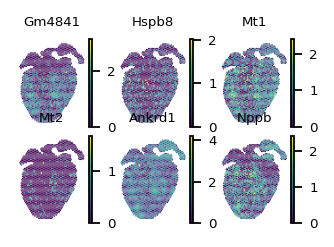

In [224]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.7,0.7), facecolor='white', frameon=True, transparent=True, vector_friendly = False, format="pdf")
sc.pl.spatial(stage_data_visium[3], color= ["Gm4841", "Hspb8", "Mt1", "Mt2", "Ankrd1", "Nppb"], ncols=3, frameon=False, 
              size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save="spatial_myocyte_ge_bz.pdf")

In [28]:
#?gseapy.enrichr
de_results = temp
# de_results = de_results[(de_results["logfoldchanges"] > 1.0) & (de_results["pvals_adj"] < 0.01)]
glist = de_results['names'].squeeze().str.strip().tolist()
print(glist)

['Gm4841', 'Hspb7', 'Ankrd1', 'Des', 'Fabp3', 'Mt1', 'Ckmt2', 'Acta1', 'Pln', 'Myl2', 'Hspb6', 'Nrap', 'Lbh', 'Acot13', 'Myl3', 'Hspb1', 'Nppb', 'Gm12185', 'Hspa9', 'Hspb8', 'Clu', 'Adprhl1', 'Sorbs2', 'Hk2', 'Mgst3', 'Pdlim5', 'Hist1h2bc', 'Pgm1', 'Tnfrsf12a', 'Pdk4', 'Gsto1']


In [29]:
# GO_Biological_Process_2021, KEGG_2019_Mouse, WikiPathways_2019_Mouse
enr_res = gseapy.enrichr(gene_list=glist, 
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2021'],
                     description='pathway', 
                     cutoff = 0.01)

Connecting to Enrichr Server to get latest library names
Analysis name: pathway, Enrichr Library: GO_Biological_Process_2021
Save file of enrichment results: Job Id:1a8ca3dacc4a61c83d396d57aed254bb
Done.



In [31]:
enr_res.results[1:20]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1,GO_Biological_Process_2021,muscle filament sliding (GO:0030049),4/38,3.358840e-07,0.000068,0,0,86.862745,1294.819497,ACTA1;DES;MYL2;MYL3
2,GO_Biological_Process_2021,response to unfolded protein (GO:0006986),4/49,9.527307e-07,0.000128,0,0,65.593416,909.382755,HSPA9;HSPB8;HSPB7;HSPB1
3,GO_Biological_Process_2021,muscle contraction (GO:0006936),5/129,1.533582e-06,0.000154,0,0,30.776985,412.039325,CKMT2;ACTA1;DES;MYL2;MYL3
4,GO_Biological_Process_2021,cardiac muscle cell development (GO:0055013),3/24,6.675091e-06,0.000537,0,0,101.775510,1212.871754,MYL2;SORBS2;PDLIM5
5,GO_Biological_Process_2021,cardiac muscle tissue morphogenesis (GO:0055008),3/32,1.622126e-05,0.001087,0,0,73.669951,812.519703,MYL2;MYL3;ANKRD1
6,GO_Biological_Process_2021,regulation of blood circulation (GO:1903522),3/35,2.133763e-05,0.001225,0,0,66.753348,717.934819,DES;PLN;HSPB7
7,GO_Biological_Process_2021,blood circulation (GO:0008015),3/51,6.676272e-05,0.003355,0,0,44.466518,427.517362,NPPB;PLN;MYL2
8,GO_Biological_Process_2021,cardiac myofibril assembly (GO:0055003),2/15,2.410801e-04,0.010059,0,0,105.867374,881.915596,MYL2;NRAP
9,GO_Biological_Process_2021,regulation of angiogenesis (GO:0045765),4/203,2.615354e-04,0.010059,0,0,14.718035,121.408198,NPPB;HSPB6;HSPB1;HK2
10,GO_Biological_Process_2021,regulation of fatty acid oxidation (GO:0046320),2/16,2.752543e-04,0.010059,0,0,98.300493,805.849262,FABP3;PDK4


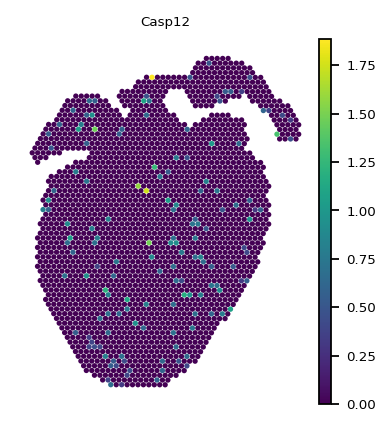

In [58]:
sc.pl.spatial(stage_data_visium[3], color= ["Casp12"], ncols=3, frameon=False, 
              size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1)